In [69]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [70]:
df = pd.read_csv('jobs_dataset.csv')
df.head()

,company,rating,location,positionName,description,salary,url,jobType/0,jobType/1,jobType/2,jobType/3,searchInput/country,searchInput/position,externalApplyLink
0,Google,4.3,"San Bruno, CA","Senior Data Scientist, Research, YouTube Search",Note: By applying to this position you will ha...,"$166,000 - $244,000 a year",https://www.indeed.com/viewjob?jk=3129ec5dde24...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.google.com/about/careers/applicati...
1,BAXTER,3.7,"Milwaukee, WI 53214",Senior AI Engineer - Data Scientist,This is where you save and sustain lives\n\nAt...,"$112,000 - $154,000 a year",https://www.indeed.com/viewjob?jk=19da1b85455c...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://jobs.baxter.com/en/job/-/-/152/8298788...
2,Meta,4.2,"Redmond, WA","Audio Software Engineer, Applied Scientist","Redmond, WA • + 2 more•Full Time\nMessenger\nM...",$70.67 an hour,https://www.indeed.com/viewjob?jk=0b0b432e2a51...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.metacareers.com/jobs/3101204833367...
3,Meta,4.2,"Bellevue, WA 98005","Software Engineer, Machine Learning","Bellevue, WA • Full Time\nMeta\nSoftware Engin...","$203,350 - $240,240 a year",https://www.indeed.com/viewjob?jk=08d2ef77c976...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.metacareers.com/jobs/1096352489054...
4,Lockheed Martin,4.0,"Shelton, CT 06484",AI / Machine Learning Research Engineer (early...,"Job ID: 694362BR\nDate posted: May. 22, 2025\n...",NaN,https://www.indeed.com/viewjob?jk=e9aad7dcc34e...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://click.appcast.io/t/V35efAz0-l7FWwo6IKe...


In [71]:
x = list(df['salary'].head(10))
print(x)

['$166,000 - $244,000 a year', '$112,000 - $154,000 a year', '$70.67 an hour', '$203,350 - $240,240 a year', nan, '$197,000 - $291,000 a year', '$128,250 - $195,000 a year', '$293,755.64 - $459,791.43 a year', '$70,000 - $120,000 a year', '$138,257.60 - $200,512.00 a year']


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company               735 non-null    object 
 1   rating                735 non-null    float64
 2   location              735 non-null    object 
 3   positionName          735 non-null    object 
 4   description           735 non-null    object 
 5   salary                506 non-null    object 
 6   url                   735 non-null    object 
 7   jobType/0             501 non-null    object 
 8   jobType/1             19 non-null     object 
 9   jobType/2             1 non-null      object 
 10  jobType/3             1 non-null      object 
 11  searchInput/country   735 non-null    object 
 12  searchInput/position  735 non-null    object 
 13  externalApplyLink     553 non-null    object 
dtypes: float64(1), object(13)
memory usage: 80.5+ KB


In [73]:
print(f"columns {df.shape[1]} rows {df.shape[0]}")

columns 14 rows 735


In [74]:
df = df.drop(['url', 'externalApplyLink'], axis=1)

In [75]:
df.head()

,company,rating,location,positionName,description,salary,jobType/0,jobType/1,jobType/2,jobType/3,searchInput/country,searchInput/position
0,Google,4.3,"San Bruno, CA","Senior Data Scientist, Research, YouTube Search",Note: By applying to this position you will ha...,"$166,000 - $244,000 a year",Full-time,NaN,NaN,NaN,US,Data Scientist
1,BAXTER,3.7,"Milwaukee, WI 53214",Senior AI Engineer - Data Scientist,This is where you save and sustain lives\n\nAt...,"$112,000 - $154,000 a year",Full-time,NaN,NaN,NaN,US,Data Scientist
2,Meta,4.2,"Redmond, WA","Audio Software Engineer, Applied Scientist","Redmond, WA • + 2 more•Full Time\nMessenger\nM...",$70.67 an hour,Full-time,NaN,NaN,NaN,US,Data Scientist
3,Meta,4.2,"Bellevue, WA 98005","Software Engineer, Machine Learning","Bellevue, WA • Full Time\nMeta\nSoftware Engin...","$203,350 - $240,240 a year",Full-time,NaN,NaN,NaN,US,Data Scientist
4,Lockheed Martin,4.0,"Shelton, CT 06484",AI / Machine Learning Research Engineer (early...,"Job ID: 694362BR\nDate posted: May. 22, 2025\n...",NaN,Full-time,NaN,NaN,NaN,US,Data Scientist


In [76]:
df.shape

(735, 12)

In [77]:
df.rating.value_counts()

rating
0.0    100
3.5     71
3.9     66
4.0     60
3.6     58
3.8     55
4.1     50
3.7     45
4.2     42
3.4     41
3.3     32
4.3     22
3.2     17
5.0     14
3.0     13
3.1     12
2.8      5
4.5      5
2.7      4
2.9      4
4.6      3
1.0      3
4.8      3
4.7      3
2.3      2
4.4      2
2.4      1
2.6      1
1.2      1
Name: count, dtype: int64

In [78]:
df.salary.describe()
a = df.salary.value_counts()
print(a)

salary
$206,000 - $281,000 a year          6
$166,000 - $244,000 a year          5
$118,200 - $204,300 a year          4
$129,300 - $223,600 a year          4
$136,000 - $223,400 a year          4
                                   ..
$135,803.23 - $175,483.45 a year    1
$74,000 - $135,000 a year           1
$157,000 - $230,000 a year          1
$90,000 - $182,000 a year           1
$104,645 - $162,000 a year          1
Name: count, Length: 385, dtype: int64


In [79]:
# Handling missing values in 'jobType' columns by backfilling and then dropping the original columns
df['jobType'] = df[['jobType/0', 'jobType/1', 'jobType/2', 'jobType/3']].bfill(axis=1).iloc[:, 0]
df = df.drop(['jobType/0', 'jobType/1', 'jobType/2', 'jobType/3'], axis=1)
df.head()

,company,rating,location,positionName,description,salary,searchInput/country,searchInput/position,jobType
0,Google,4.3,"San Bruno, CA","Senior Data Scientist, Research, YouTube Search",Note: By applying to this position you will ha...,"$166,000 - $244,000 a year",US,Data Scientist,Full-time
1,BAXTER,3.7,"Milwaukee, WI 53214",Senior AI Engineer - Data Scientist,This is where you save and sustain lives\n\nAt...,"$112,000 - $154,000 a year",US,Data Scientist,Full-time
2,Meta,4.2,"Redmond, WA","Audio Software Engineer, Applied Scientist","Redmond, WA • + 2 more•Full Time\nMessenger\nM...",$70.67 an hour,US,Data Scientist,Full-time
3,Meta,4.2,"Bellevue, WA 98005","Software Engineer, Machine Learning","Bellevue, WA • Full Time\nMeta\nSoftware Engin...","$203,350 - $240,240 a year",US,Data Scientist,Full-time
4,Lockheed Martin,4.0,"Shelton, CT 06484",AI / Machine Learning Research Engineer (early...,"Job ID: 694362BR\nDate posted: May. 22, 2025\n...",NaN,US,Data Scientist,Full-time


In [80]:
import re
import numpy as np
import pandas as pd

def parse_salary(s):
    if pd.isna(s):
        return np.nan
    
    # Match patterns like $166,000, 70.67, etc.
    matches = re.findall(r'\$?\d[\d,]*\.?\d*',str(s))
    nums = []
    for m in matches:
        m_clean = m.replace('$', '').replace(',', '')
        try:
            nums.append(float(m_clean))
        except:
            pass # Ignore conversion errors 

    if len(nums) == 1:
        return nums[0]
    elif len(nums) >= 2: 
        return np.mean(nums)
    return np.nan  

# Detect hourly salaries
df['is_hourly'] = df['salary'].str.contains('hour', case=False, na=False)

# Apply the parsing function to the salary column
df['salary_clean'] = df['salary'].apply(parse_salary)

# convert hourly to yearly (assuming 2080 working hours in a year)
df.loc[df['is_hourly'], 'salary_clean'] = df.loc[df['is_hourly'], 'salary_clean'] * 2080

df = df.drop(['salary', 'is_hourly'], axis=1)

In [81]:
df.head()

,company,rating,location,positionName,description,searchInput/country,searchInput/position,jobType,salary_clean
0,Google,4.3,"San Bruno, CA","Senior Data Scientist, Research, YouTube Search",Note: By applying to this position you will ha...,US,Data Scientist,Full-time,205000.0
1,BAXTER,3.7,"Milwaukee, WI 53214",Senior AI Engineer - Data Scientist,This is where you save and sustain lives\n\nAt...,US,Data Scientist,Full-time,133000.0
2,Meta,4.2,"Redmond, WA","Audio Software Engineer, Applied Scientist","Redmond, WA • + 2 more•Full Time\nMessenger\nM...",US,Data Scientist,Full-time,146993.6
3,Meta,4.2,"Bellevue, WA 98005","Software Engineer, Machine Learning","Bellevue, WA • Full Time\nMeta\nSoftware Engin...",US,Data Scientist,Full-time,221795.0
4,Lockheed Martin,4.0,"Shelton, CT 06484",AI / Machine Learning Research Engineer (early...,"Job ID: 694362BR\nDate posted: May. 22, 2025\n...",US,Data Scientist,Full-time,NaN


In [82]:
df.isna().sum()

company                   0
rating                    0
location                  0
positionName              0
description               0
searchInput/country       0
searchInput/position      0
jobType                 234
salary_clean            229
dtype: int64

In [83]:
df.isna().mean() * 100

company                  0.000000
rating                   0.000000
location                 0.000000
positionName             0.000000
description              0.000000
searchInput/country      0.000000
searchInput/position     0.000000
jobType                 31.836735
salary_clean            31.156463
dtype: float64

In [84]:
df = df.fillna({
    'salary_clean': df['salary_clean'].median(),
    'jobType': 'Unknown',
})

df.isna().sum()

company                 0
rating                  0
location                0
positionName            0
description             0
searchInput/country     0
searchInput/position    0
jobType                 0
salary_clean            0
dtype: int64

In [85]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

for col in ['company', 'location', 'positionName', 'jobType', 'searchInput/country', 'searchInput/position']:
    # Encode categorical columns
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Scale numerical columns
scaler = StandardScaler()
df[['rating', 'salary_clean']] = scaler.fit_transform(df[['rating', 'salary_clean']])

In [86]:
df.head(30)

,company,rating,location,positionName,description,searchInput/country,searchInput/position,jobType,salary_clean
0,174,0.787166,249,427,Note: By applying to this position you will ha...,0,0,1,0.794382
1,52,0.344893,166,374,This is where you save and sustain lives\n\nAt...,0,0,1,-0.763404
2,255,0.713454,228,103,"Redmond, WA • + 2 more•Full Time\nMessenger\nM...",0,0,1,-0.460640
3,255,0.713454,37,490,"Bellevue, WA • Full Time\nMeta\nSoftware Engin...",0,0,1,1.157757
4,230,0.566029,277,10,"Job ID: 694362BR\nDate posted: May. 22, 2025\n...",0,0,1,0.016030
5,174,0.787166,54,527,Note: By applying to this position you will ha...,0,0,1,1.638183
6,209,0.492317,138,76,JOB DESCRIPTION\n\nLeverage your technical exp...,0,0,1,-0.144076
7,103,0.271181,258,218,"Universal Ads, a part of Comcast, enables any ...",0,0,1,4.510860
8,325,0.492317,33,53,Riverside Overview: Riverside Research is an i...,0,0,1,-1.585569
9,248,0.418605,238,463,Why Mayo Clinic\n\nMayo Clinic is top-ranked i...,0,0,1,0.023815


In [91]:
df = df.drop(['description'], axis=1)

In [92]:
X = df.drop(['salary_clean'], axis=1)
y = df['salary_clean']

In [93]:
df.head()

,company,rating,location,positionName,searchInput/country,searchInput/position,jobType,salary_clean
0,174,0.787166,249,427,0,0,1,0.794382
1,52,0.344893,166,374,0,0,1,-0.763404
2,255,0.713454,228,103,0,0,1,-0.460640
3,255,0.713454,37,490,0,0,1,1.157757
4,230,0.566029,277,10,0,0,1,0.016030


In [94]:
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import  mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (588, 7), Test shape: (147, 7)


In [ ]:
pip install jinja2 # type: ignore

Defaulting to user installation because normal site-packages is not writeable

   -------------------- ------------------- 1/2 [jinja2]
   -------------------- ------------------- 1/2 [jinja2]
   -------------------- ------------------- 1/2 [jinja2]
   -------------------- ------------------- 1/2 [jinja2]
   -------------------- ------------------- 1/2 [jinja2]
   -------------------- ------------------- 1/2 [jinja2]
   -------------------- ------------------- 1/2 [jinja2]
   ---------------------------------------- 2/2 [jinja2]

Note: you may need to restart the kernel to use updated packages.


In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor( random_state=42),
    "SVR": SVR()  
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    results[name] = {
        "R²": r2,
        "RMSE": rmse
}
    
results_df = pd.DataFrame(results).T

styled_results = (
    results_df.style
    .background_gradient(subset = ["R²"], cmap="Greens" , low=0, high=1)
    .background_gradient(subset = ["RMSE"], cmap="Reds", low=0, high=1)
    .format({"R²": "{:.3f}", "RMSE": "{:.3f}"})
)


print("Model Performance Comparison: ")
display(styled_results)

Model Performance Comparison: 


,R²,RMSE
Linear Regression,-0.004,0.732
Random Forest,0.192,0.589
Gradient Boosting,0.071,0.678
SVR,-0.004,0.732


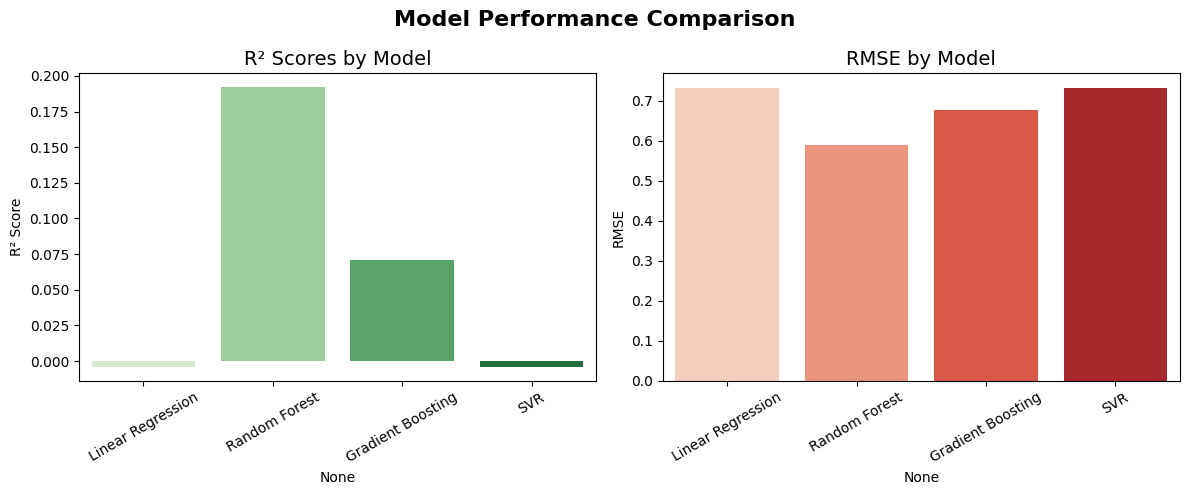

In [102]:
plt.figure(figsize=(12,5))

# Plotting R² Scores
plt.subplot(1, 2, 1)
sns.barplot(x=results_df.index, y='R²', data=results_df, palette="Greens")
plt.title('R² Scores by Model', fontsize=14)
plt.ylabel('R² Score')
plt.xticks(rotation=30)

# Plotting RMSE
plt.subplot(1, 2, 2)
sns.barplot(x=results_df.index, y='RMSE', data=results_df, palette="Reds")
plt.title('RMSE by Model', fontsize=14)
plt.ylabel('RMSE')
plt.xticks(rotation=30)

plt.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()